In [37]:
import pandas as pd
import math
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [38]:
headers = ["buying", "maint", "doors", "persons","lug_boot", "safety", "class"]
data = pd.read_csv("car_data.csv", header=None, names=headers)

data = data.sample(frac=1).reset_index(drop=True) # shuffle

In [39]:
for h in headers:
    data[h] = data[h].astype('category')
    data[h] = data[h].cat.codes

data.set_index("class", inplace=True)

In [40]:
size = len(data)
train_size = int(math.floor(size * 0.7))
train_data = data[:train_size]
test_data = data[train_size:]

In [41]:
d_tree = DecisionTreeClassifier(criterion="gini")
d_tree.fit(train_data, train_data.index) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
d_tree.predict(test_data.iloc[:, 0:6])
d_tree.score(test_data, test_data.index)

0.97109826589595372

In [43]:
d_tree2 = DecisionTreeClassifier(criterion="entropy")
d_tree2.fit(train_data, train_data.index)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
d_tree2.predict(test_data.iloc[:, 0:6])
d_tree2.score(test_data, test_data.index)

0.98843930635838151

In [48]:
from sklearn.ensemble import RandomForestClassifier

def score_per_estimators(n_estimators, train_data, test_data):
    scores = []
    for i in range(1, n_estimators):
        RF = RandomForestClassifier(n_estimators=i, criterion="entropy")
        RF.fit(train_data, train_data.index)
        
        RF.predict(test_data.iloc[:, 0:6])
        score = RF.score(test_data, test_data.index)
        scores.append(score)
        
    return scores

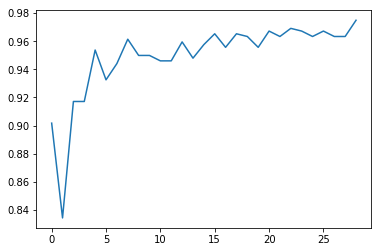

In [52]:
scores = score_per_estimators(30, train_data, test_data)

plt.plot(scores)
plt.show()